# Released under MIT License

Copyright (c) 2013 Mark Otto.

Copyright (c) 2017 Andrew Fong.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset

# About Dataset

***Dataset Summary***

The Animal Image Classification Dataset is a comprehensive collection of images tailored for the development and evaluation of machine learning models in the field of computer vision. It contains 3,000 JPG images, carefully segmented into three classes representing common pets and wildlife: cats, dogs, and snakes.

Dataset Contents
cats/: A set of 1,000 JPG images of cats, showcasing a wide array of breeds, environments, and postures.

dogs/: A diverse compilation of 1,000 dog images, capturing a multitude of breeds in various activities and settings.

snakes/: An assortment of 1,000 images of snakes, depicting numerous species in both natural and controlled habitats. Image Details:

Resolution: Each image maintains a uniform resolution of 256x256 pixels, providing clarity and consistency for model training.

File Format: JPG Color Space: RGB

Intended Applications
This dataset is primed for use in developing and testing AI models specialized in multi-class animal recognition. It offers valuable resources for researchers and hobbyists in fields such as zoology, pet technology, and biodiversity conservation.

Acknowledgements and Licensing
This dataset is a collective effort of various photographers and organizations. All images are distributed with permissions for academic and non-commercial usage, provided that proper attribution is given to the original sources.

# Про набір даних

***Короткий опис набору даних***

Набір даних «Класифікація зображень тварин» - це повна колекція зображень, призначена для розробки та оцінки моделей машинного навчання в галузі комп'ютерного зору. Він містить 3 000 зображень у форматі JPG, ретельно сегментованих на три класи, що представляють найпоширеніших домашніх та диких тварин: котів, собак та змій.

Зміст набору даних
cats/: Набір з 1,000 JPG зображень котів, що демонструють широкий спектр порід, середовищ та поз.

собаки/: Різноманітна добірка з 1,000 зображень собак, що демонструє безліч порід у різних видах діяльності та середовищах.

змії/: Підбірка з 1 000 зображень змій, на яких зображені численні види як у природному, так і в контрольованому середовищі існування. Деталі зображення:

Роздільна здатність: Кожне зображення має однакову роздільну здатність 256x256 пікселів, що забезпечує чіткість і послідовність для навчання моделі.

Формат файлу: JPG Колірний простір: RGB

Призначення
Цей набір даних призначений для використання при розробці та тестуванні моделей штучного інтелекту, що спеціалізуються на розпізнаванні тварин різних класів. Він пропонує цінні ресурси для дослідників і аматорів у таких галузях, як зоологія, технології для домашніх тварин і збереження біорізноманіття.

Подяки та ліцензування
Цей набір даних є результатом колективних зусиль різних фотографів та організацій. Всі зображення розповсюджуються з дозволом на академічне та некомерційне використання за умови належного посил

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

In [6]:
# files_image_path = '../../classification/animal/data/'
# categories = ["cats", "dogs", "snakes"]
# data = []

# for label in categories:
#     folder = os.path.join(files_image_path, label)
#     for filename in os.listdir(folder):
#         if filename.endswith(('.jpg', '.png', '.jpeg')):
#             path = os.path.join(folder, filename)
#             data.append((path, label))

# df = pd.DataFrame(data, columns=['image', 'label'])
# print(df.head())

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [ ]:
import tensorflow as tf

image_size = (256, 256)
batch_size = 32
data_dir = '../../classification/animal/data/'

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32,
    label_mode='categorical'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
class_names = train_ds.class_names


Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


2025-05-08 20:50:59.097288: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-05-08 20:50:59.097315: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-08 20:50:59.097322: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-08 20:50:59.097341: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-08 20:50:59.097360: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    print("First label (one-hot):", labels[0].numpy())
    print("Corresponding class:", tf.argmax(labels[0]).numpy())
    print("Class name:", train_ds.class_names[tf.argmax(labels[0]).numpy()])


Image batch shape: (32, 256, 256, 3)
Label batch shape: (32, 3)
First label (one-hot): [0. 1. 0.]
Corresponding class: 1
Class name: dogs


2025-05-08 19:55:28.183852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

/Users/mariiasv/Documents/Project/junior-ds-prep/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)


Epoch 1/10


2025-05-08 20:24:16.655270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 137ms/step - accuracy: 0.3017 - loss: 70133.1953 - val_accuracy: 0.3750 - val_loss: 3391.4827
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.4157 - loss: 3290.9575 - val_accuracy: 0.4217 - val_loss: 1376.2144
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.4282 - loss: 2379.6057 - val_accuracy: 0.3600 - val_loss: 2430.0203
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.4146 - loss: 3101.4373 - val_accuracy: 0.4233 - val_loss: 2481.9978
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.4829 - loss: 1554.8186 - val_accuracy: 0.3983 - val_loss: 3722.6985
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.4153 - loss: 3555.3418 - val_accuracy: 0.4183 - val_loss: 1192.6401
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step - accuracy: 0.5067 - loss: 1128.3826 - val_accuracy: 0.3683 - val_loss: 1882.0109
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  
])


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,          
    restore_best_weights=True 
)


In [17]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30, 
    callbacks=[early_stop]
)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.9078 - loss: 0.3598 - val_accuracy: 0.6800 - val_loss: 2.0412
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 178ms/step - accuracy: 0.9114 - loss: 0.3482 - val_accuracy: 0.6700 - val_loss: 2.5662
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.9423 - loss: 0.2703 - val_accuracy: 0.6433 - val_loss: 2.8390
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 172ms/step - accuracy: 0.9325 - loss: 0.3557 - val_accuracy: 0.6167 - val_loss: 3.7926


In [ ]:
loss, acc = model.evaluate(test_ds)
print(f"Test accuracy: {acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


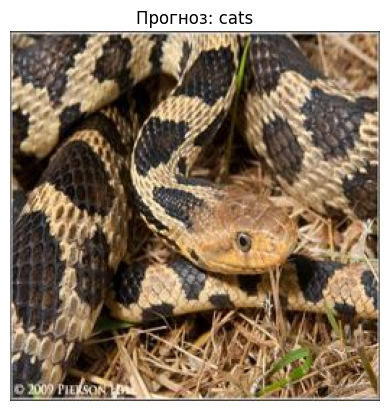

In [ ]:
def predict_and_plot(img_path, model, class_names, image_size=(256, 256)):
    img = load_img(img_path, target_size=image_size)
    img_array = img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, 0)

    pred = model.predict(img_array)[0]
    predicted_class_idx = np.argmax(pred)
    confidence = np.max(pred)

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Прогноз: {class_names[predicted_class_idx]} ({confidence:.2f})")
    plt.show()

